<h2 align="center">8_C</h2> 

#### Importing the libraries

In [6]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [7]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

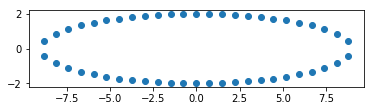

In [8]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

#### Creating the dataset

In [9]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

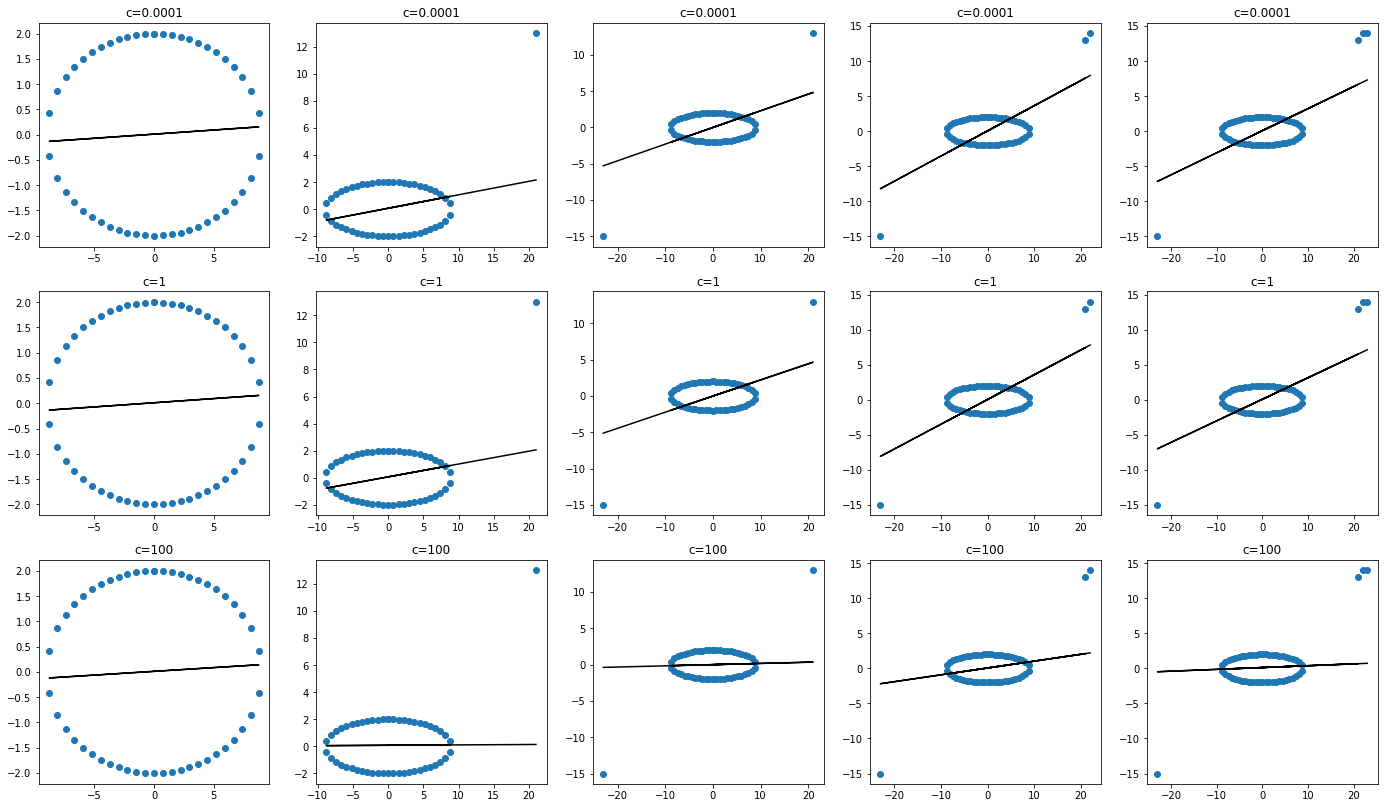

In [10]:
s=0
outlier = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
alpha=[0.0001,1,100] 
plt.figure(figsize=(24,14))
for reg in alpha:
    X_NEW=X
    Y_NEW=Y
    for j,i in enumerate(outlier):
        s=s+1
        X_NEW=np.append(X_NEW,i[0]).reshape(-1,1)
        Y_NEW=np.append(Y_NEW,i[1]).reshape(-1,1)
        model=SGDRegressor(alpha=reg, eta0=0.001, learning_rate='constant',random_state=10)
        model.fit(X_NEW,Y_NEW)
        predict=model.predict(X_NEW)
        plt.subplot(3, 5, s)
        plt.title("c="+str(reg))
        plt.scatter(X_NEW,Y_NEW)
        plt.plot(X_NEW,predict,color="black")
    
        

### Observations

* AS REGULRIZATION TERM INCREASES IT TRIES TO NEGLECT THE EFFECT OF OUTLIERS.
* FOR SMALL ALPHA"S REGULARIZATION STRENGTH IS SMALL,AS THE NUMBER OF OUTLIER INCREASES IT WILL TRY TO REDUCE THE OVERFIT     BUT REDUCTION STRENGTH IS SMALL BECAUSE OF LOW REGULARIZATION STENGTH.
* WHEN REGULARIZATION STENGTH INCREASES IT WILL TRY TO REDUCE OVERFIT AS THE NUMBER OF OUTLIER INCREASES
* INCREASING LAMBDA RESULTS IN LESS OVERFITTING.